In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/drive/MyDrive/ML-Project/crops-data.csv")
df.head()

,Unnamed: 0,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
0,0,4,30,32,40,24,46,21,wheat
1,1,4,30,33,43,21,47,22,wheat
2,2,4,30,33,45,19,47,20,wheat
3,3,4,30,34,43,19,48,20,wheat
4,4,4,30,34,45,24,50,19,wheat


In [7]:
df['Crop'] = df['Crop'].replace(['mustedplant'],'mustardplant')
del df['Unnamed: 0']
df.tail()

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
898,7,77,11,19,40,55,37,mustardplant
899,7,77,12,15,41,59,41,mustardplant
900,7,78,10,20,39,56,39,mustardplant
901,7,78,15,23,41,57,40,mustardplant
902,7,80,10,24,41,59,37,mustardplant


In [8]:
df.head(10)

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
0,4,30,32,40,24,46,21,wheat
1,4,30,33,43,21,47,22,wheat
2,4,30,33,45,19,47,20,wheat
3,4,30,34,43,19,48,20,wheat
4,4,30,34,45,24,50,19,wheat
5,4,30,35,41,24,45,21,wheat
6,4,30,37,40,21,45,23,wheat
7,4,30,37,40,23,49,20,wheat
8,4,30,37,41,21,50,22,wheat
9,4,30,39,42,20,50,22,wheat


In [9]:
df.to_csv("/content/drive/MyDrive/ML-Project/crops-data.csv")

In [10]:
X=df.iloc[:,0:7]
Y=df.iloc[:,-1]

In [11]:
df.isnull().sum()

Ph             0
Rainfall       0
Humidity       0
Temperature    0
Potassium      0
Nitrogen       0
Phosphorus     0
Crop           0
dtype: int64

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ph           903 non-null    int64 
 1   Rainfall     903 non-null    int64 
 2   Humidity     903 non-null    int64 
 3   Temperature  903 non-null    int64 
 4   Potassium    903 non-null    int64 
 5   Nitrogen     903 non-null    int64 
 6   Phosphorus   903 non-null    int64 
 7   Crop         903 non-null    object
dtypes: int64(7), object(1)
memory usage: 56.6+ KB
None


In [13]:
df['Crop'].value_counts()

paddy           386
wheat           262
mustardplant    124
maize            81
sugarcane        50
Name: Crop, dtype: int64

In [14]:
dff= df.sample(frac = 1)
dff.head(10)

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
786,4,47,20,30,24,47,23,mustardplant
510,4,168,55,25,35,110,35,paddy
407,4,145,60,22,28,112,34,paddy
302,3,132,46,19,27,94,24,paddy
160,5,40,33,41,19,45,19,wheat
708,4,34,30,33,19,48,23,maize
239,6,46,43,31,23,54,27,wheat
432,4,146,53,25,29,102,34,paddy
99,5,32,40,45,21,50,22,wheat
505,4,168,55,22,29,111,33,paddy


In [15]:
df.describe()

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus
count,903.00000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,4.68660,98.427464,42.931340,28.772979,30.186047,76.483942,30.087486
std,0.95828,59.380103,13.502063,8.044393,12.160637,29.459385,12.193019
min,3.00000,30.000000,9.000000,15.000000,18.000000,45.000000,18.000000
25%,4.00000,41.000000,35.000000,22.000000,23.000000,50.000000,23.000000
50%,4.00000,71.000000,45.000000,25.000000,27.000000,58.000000,27.000000
75%,5.00000,150.000000,52.000000,34.000000,34.000000,102.000000,34.000000
max,7.00000,289.000000,80.000000,45.000000,80.000000,150.000000,80.000000


In [16]:
df.shape

(903, 8)

In [17]:
df.columns

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus', 'Crop'],
      dtype='object')

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus
Ph,1.000000,-0.292755,-0.248949,0.086542,0.413237,-0.155595,0.413573
Rainfall,-0.292755,1.000000,0.708201,-0.689774,0.465976,0.924474,0.471187
Humidity,-0.248949,0.708201,1.000000,-0.287401,0.289897,0.717478,0.286217
Temperature,0.086542,-0.689774,-0.287401,1.000000,-0.360693,-0.622005,-0.377720
Potassium,0.413237,0.465976,0.289897,-0.360693,1.000000,0.685687,0.969108
Nitrogen,-0.155595,0.924474,0.717478,-0.622005,0.685687,1.000000,0.687989
Phosphorus,0.413573,0.471187,0.286217,-0.377720,0.969108,0.687989,1.000000


<ipython-input-19-fb209ac85d48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

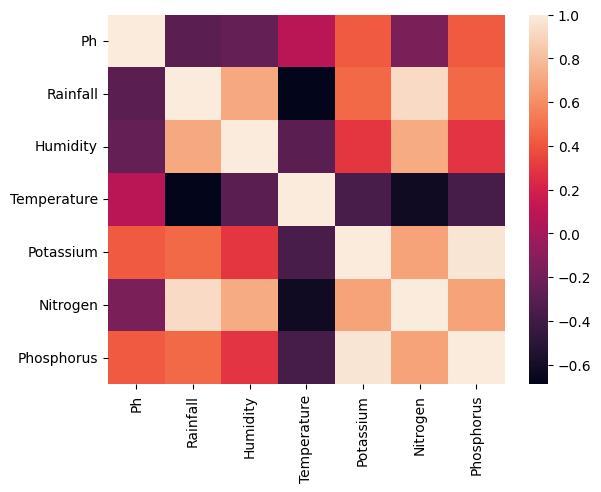

In [19]:
figsize=(8, 6)
sns.heatmap(df.corr())

<ipython-input-20-2e17d8f12919>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Temperature',shade=True,hue='Crop')


<Axes: xlabel='Temperature', ylabel='Density'>

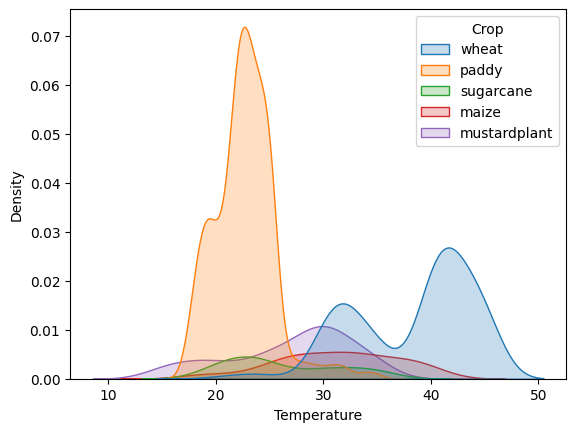

In [20]:
plt.figsize=(10, 8)
sns.kdeplot(data=df, x='Temperature',shade=True,hue='Crop')

<ipython-input-21-19f8d7199843>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Rainfall',shade=True,hue='Crop')


<Axes: xlabel='Rainfall', ylabel='Density'>

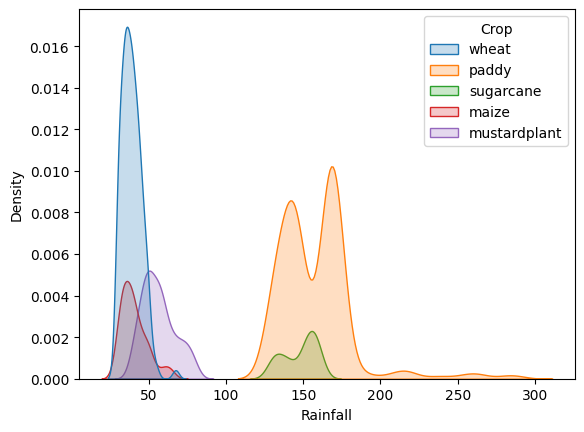

In [21]:
sns.kdeplot(data=df, x='Rainfall',shade=True,hue='Crop')

<Figure size 1600x600 with 0 Axes>

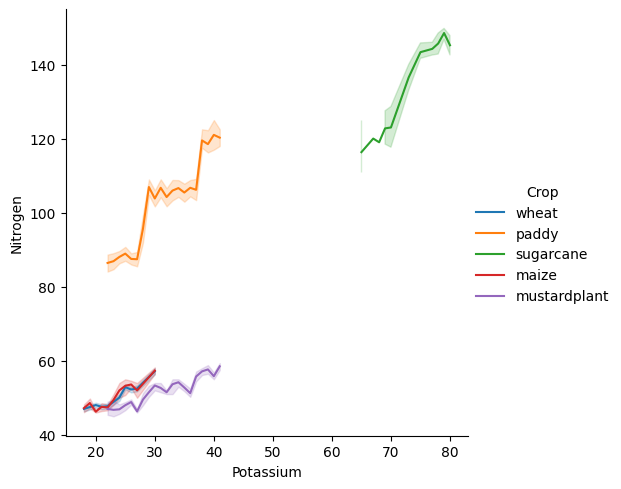

In [22]:
plt.figure(figsize=(16, 6))
sns.relplot(data=df, x='Potassium',y='Nitrogen',kind='line',hue='Crop')

In [23]:
X=df[['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus']]
Y=df['Crop']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
df.columns

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus', 'Crop'],
      dtype='object')

In [25]:
model.predict([[2,54,5,227,5,9,32]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'mustardplant'

In [26]:
model.score(X_test,y_test)

0.994475138121547

In [27]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
X=df[['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus']]
Y=df[['Crop']]

In [28]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9613259668508287

In [29]:
dt.predict([[4,30,37,21,23,49,20]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'maize'

In [30]:
df.columns[0:7]

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus'],
      dtype='object')

[Text(0.6125, 0.9583333333333334, 'x[1] <= 130.5\ngini = 0.703\nsamples = 722\nvalue = [64, 98, 311, 43, 206]'),
 Text(0.5125, 0.875, 'x[2] <= 29.5\ngini = 0.592\nsamples = 371\nvalue = [64, 98, 0, 3, 206]'),
 Text(0.4625, 0.7916666666666666, 'gini = 0.0\nsamples = 97\nvalue = [0, 97, 0, 0, 0]'),
 Text(0.5625, 0.7916666666666666, 'x[3] <= 39.5\ngini = 0.38\nsamples = 274\nvalue = [64, 1, 0, 3, 206]'),
 Text(0.225, 0.7083333333333334, 'x[1] <= 40.5\ngini = 0.519\nsamples = 142\nvalue = [60, 1, 0, 3, 78]'),
 Text(0.1, 0.625, 'x[6] <= 25.5\ngini = 0.095\nsamples = 40\nvalue = [38, 0, 0, 0, 2]'),
 Text(0.05, 0.5416666666666666, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0, 0, 0]'),
 Text(0.15, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(0.35, 0.625, 'x[3] <= 29.5\ngini = 0.397\nsamples = 102\nvalue = [22, 1, 0, 3, 76]'),
 Text(0.25, 0.5416666666666666, 'x[2] <= 50.5\ngini = 0.355\nsamples = 26\nvalue = [20, 0, 0, 0, 6]'),
 Text(0.2, 0.4583333333333333, 'g

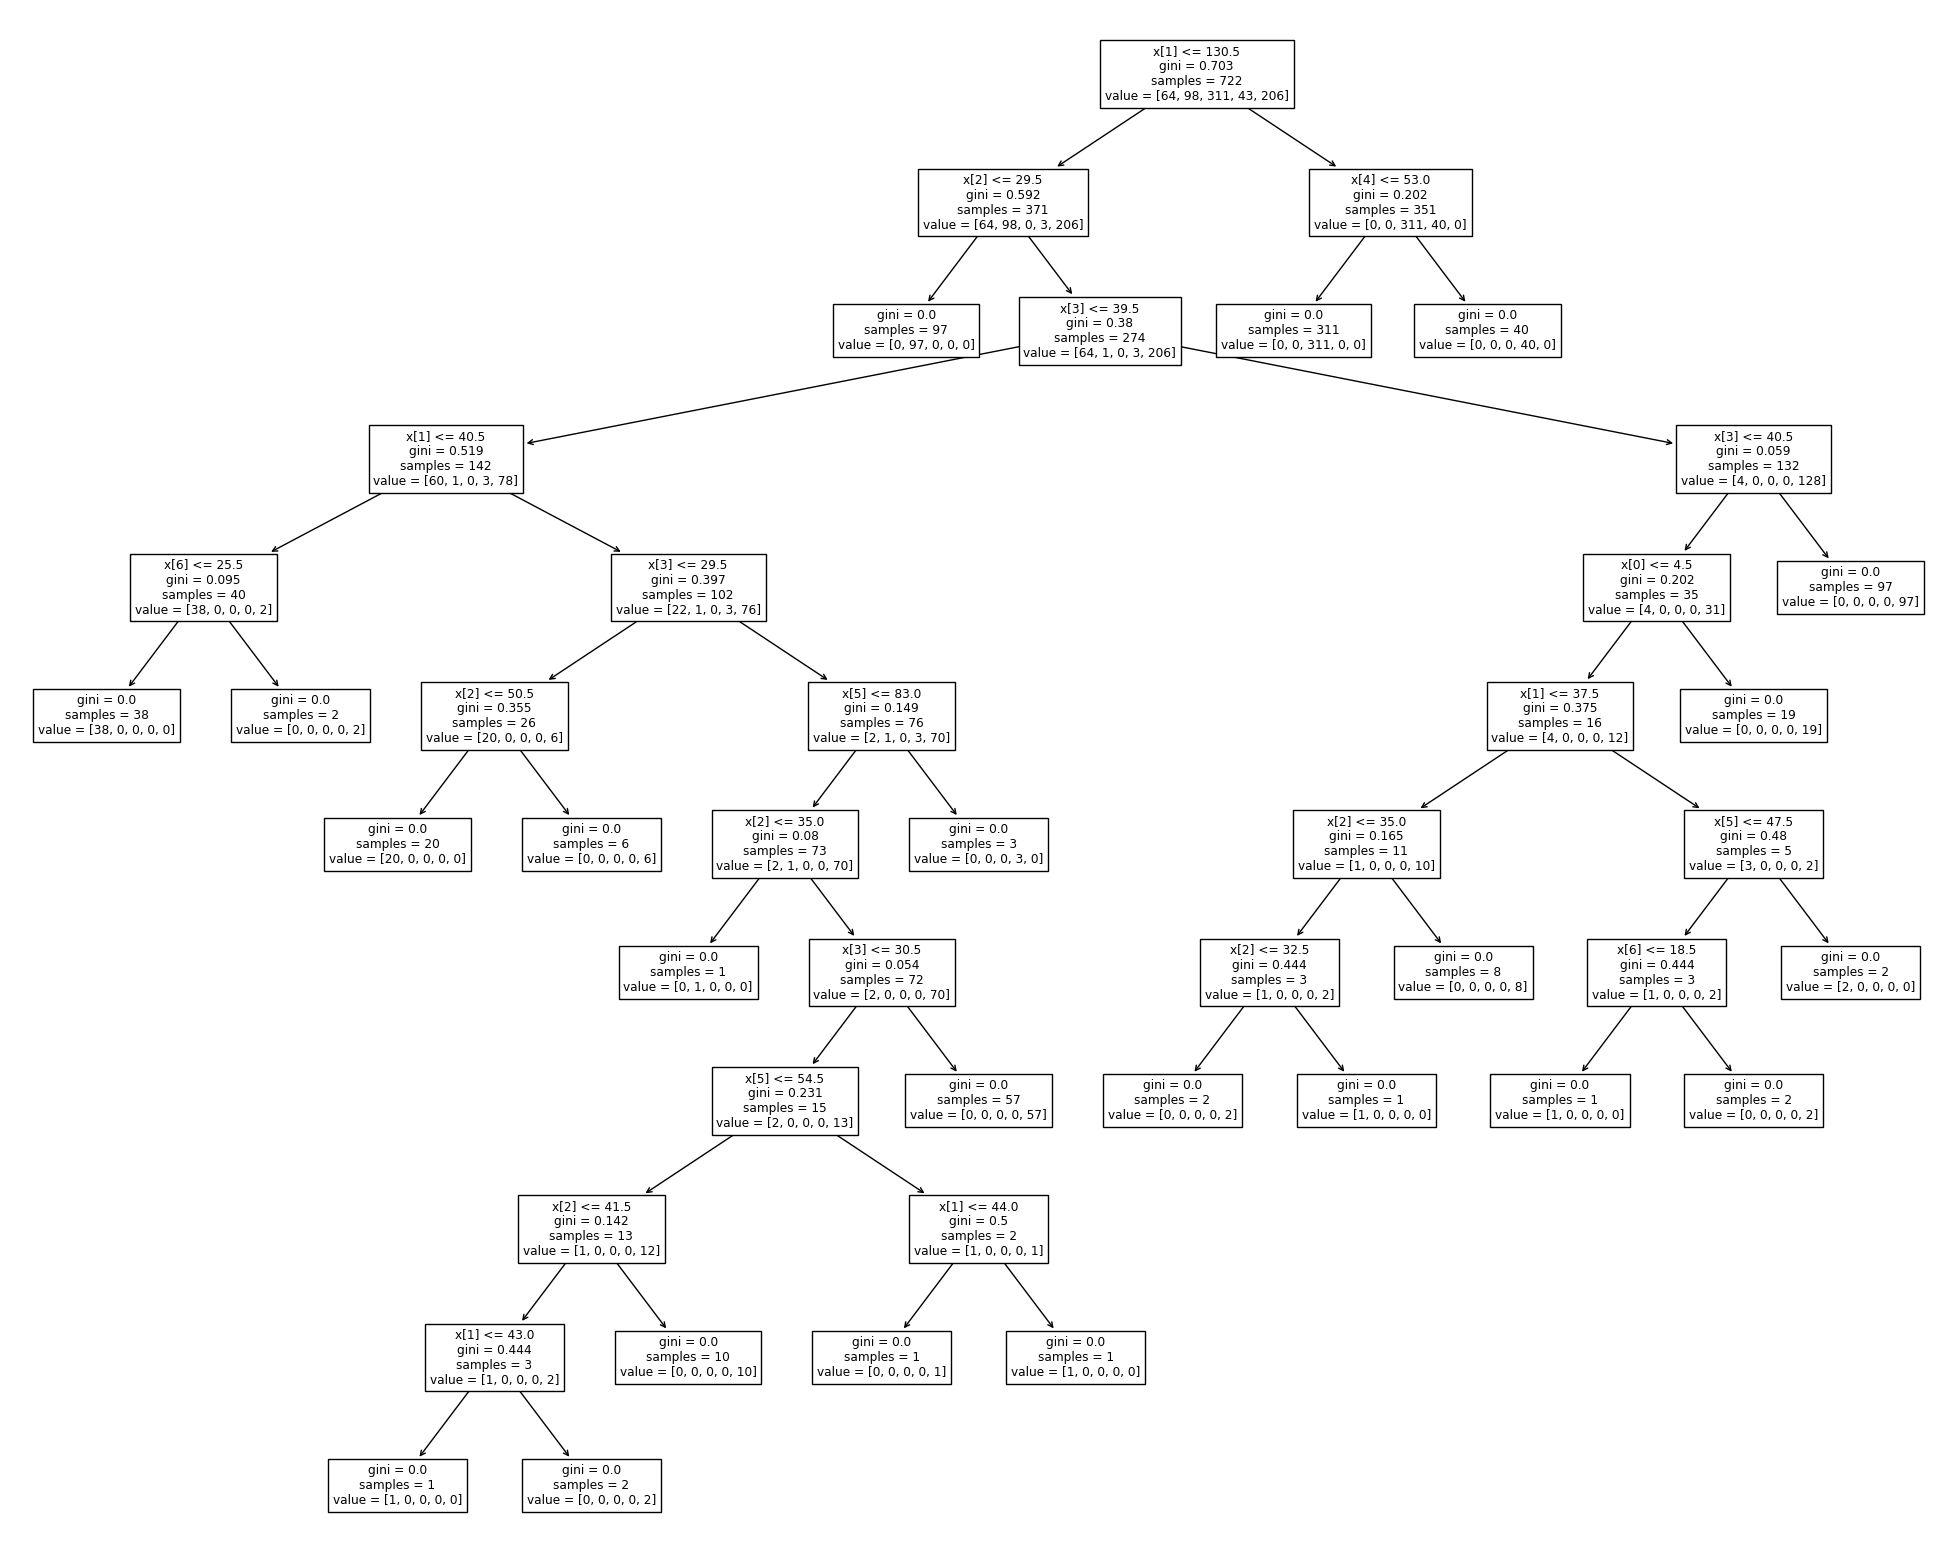

In [31]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dt)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
X=df[['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus']]
Y=df[['Crop']]
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
